# MeJ Makers 24' Autumn School
# **AI Generative Algorithms - Learning week in Cluj**

## Machine Learning Basics : Neural Networks and Training -- *Neural Networks*

### 1. Define a neural network with the following structure:
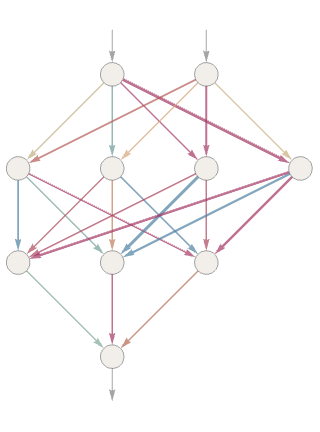

In [28]:
import tensorflow as tf

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),  # Explicitly define the input layer
    tf.keras.layers.Dense(4, activation='relu'),  # First layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(3, activation='relu'),                     # Second layer with 3 neurons and ReLU activation
    tf.keras.layers.Dense(1)                                         # Output layer with 1 neuron (scalar output)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary to see the structure
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
import numpy as np

# Define the input data
input_data = np.array([[0.5, -0.8]])

# Make a prediction using the model
output = model.predict(input_data)

# Print the output
print("Output for input [0.5, -0.8]:", output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Output for input [0.5, -0.8]: [[-0.02406348]]


### 2. Define three points located on a circle of diameters 0.7 with respective angles of Pi/2, Pi/2 + 2 Pi/3, Pi/2 + 4 Pi/3 and visualize them.

In [15]:
import numpy as np

# Diameter of the circle
diameter = 0.7
radius = diameter / 2

# Angles in radians
angle1 = np.pi / 2
angle2 = np.pi / 2 + 2 * np.pi / 3
angle3 = np.pi / 2 + 4 * np.pi / 3

# Calculate coordinates for each point
point1 = [radius * np.cos(angle1), radius * np.sin(angle1)]
point2 = [radius * np.cos(angle2), radius * np.sin(angle2)]
point3 = [radius * np.cos(angle3), radius * np.sin(angle3)]

# Print the points
print("Point 1:", point1)
print("Point 2:", point2)
print("Point 3:", point3)

Point 1: [np.float64(2.143131898507868e-17), np.float64(0.35)]
Point 2: [np.float64(-0.30310889132455354), np.float64(-0.1749999999999999)]
Point 3: [np.float64(0.30310889132455343), np.float64(-0.17500000000000016)]


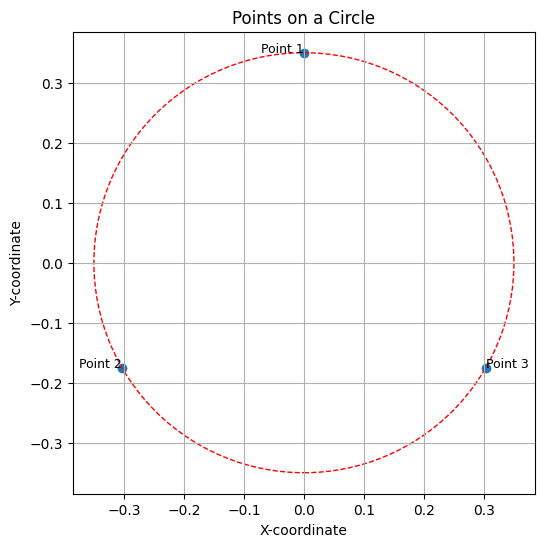

In [17]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from the points
x_coords = [point1[0], point2[0], point3[0]]
y_coords = [point1[1], point2[1], point3[1]]

# Create a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords)

# Add labels and title
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Points on a Circle")

# Set equal aspect ratio so the circle doesn't look distorted
plt.gca().set_aspect('equal', adjustable='box')

# Add a circle to the plot for reference
circle = plt.Circle((0, 0), radius, color='r', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Add point labels
plt.text(point1[0], point1[1], 'Point 1', fontsize=9, ha='right')
plt.text(point2[0], point2[1], 'Point 2', fontsize=9, ha='right')
plt.text(point3[0], point3[1], 'Point 3', fontsize=9, ha='left')


# Show the plot
plt.grid(True)
plt.show()

### 3. Define a function returning, for any entry point in the unit square centered at the origin, -1, 0, or 1 depending on which amongst the three previous point is the closer and visualize it on a 3D plot.

In [18]:
import numpy as np

def closest_point_index(entry_point, point1, point2, point3):
  """
  Returns -1, 0, or 1 depending on which of the three points is closer
  to the entry point.

  Args:
    entry_point: A tuple or list representing the (x, y) coordinates
                 of the entry point.
    point1, point2, point3: Tuples or lists representing the (x, y)
                           coordinates of the three reference points.

  Returns:
    -1 if point1 is closest, 0 if point2 is closest, 1 if point3 is closest.
  """
  # Calculate the Euclidean distance from the entry point to each of the three points
  dist1 = np.linalg.norm(np.array(entry_point) - np.array(point1))
  dist2 = np.linalg.norm(np.array(entry_point) - np.array(point2))
  dist3 = np.linalg.norm(np.array(entry_point) - np.array(point3))

  # Find the index of the closest point
  distances = [dist1, dist2, dist3]
  closest_index = np.argmin(distances)

  # Return -1, 0, or 1 based on the closest index
  if closest_index == 0:
    return -1
  elif closest_index == 1:
    return 0
  else:
    return 1

# Example usage:
# Test with a point close to point1 (e.g., (0, 0.3))
test_point1 = (0, 0.3)
closest_to_test1 = closest_point_index(test_point1, point1, point2, point3)
print(f"For entry point {test_point1}, the closest point index is: {closest_to_test1}")

# Test with a point close to point2 (e.g., (-0.2, -0.1))
test_point2 = (-0.2, -0.1)
closest_to_test2 = closest_point_index(test_point2, point1, point2, point3)
print(f"For entry point {test_point2}, the closest point index is: {closest_to_test2}")

# Test with a point close to point3 (e.g., (0.2, -0.1))
test_point3 = (0.2, -0.1)
closest_to_test3 = closest_point_index(test_point3, point1, point2, point3)
print(f"For entry point {test_point3}, the closest point index is: {closest_to_test3}")

For entry point (0, 0.3), the closest point index is: -1
For entry point (-0.2, -0.1), the closest point index is: 0
For entry point (0.2, -0.1), the closest point index is: 1


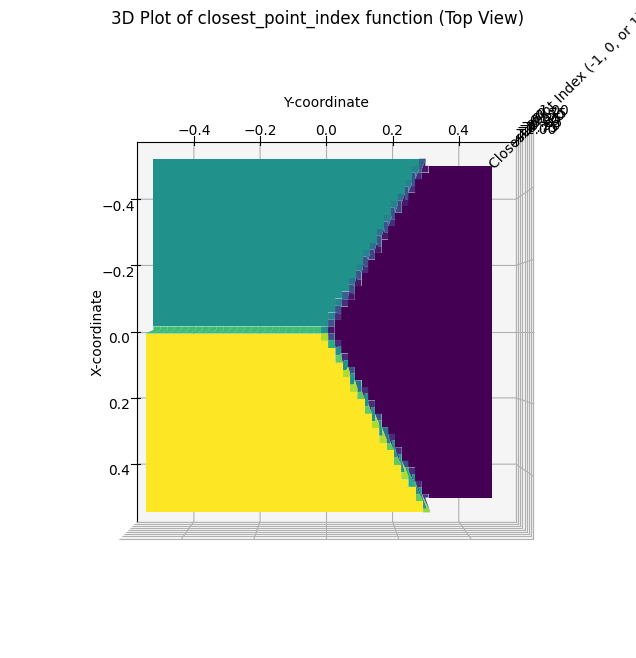

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a grid of points in the unit square centered at the origin
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)

# Apply the closest_point_index function to each point in the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        entry_point = (X[i, j], Y[i, j])
        Z[i, j] = closest_point_index(entry_point, point1, point2, point3)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Closest Point Index (-1, 0, or 1)')
ax.set_title('3D Plot of closest_point_index function (Top View)')

# Set the viewing angle for a top-down view
ax.view_init(elev=90, azim=0) # elev=90 for top view, azim=0 or any value

# Show the plot
plt.show()

### 4. Generate a training set based on the previous function

In [20]:
# Generate a dataset for training
num_samples = 1000  # Number of training samples
X_train = np.random.uniform(-0.5, 0.5, size=(num_samples, 2)) # Generate random points in the unit square

# Generate the corresponding labels using the closest_point_index function
y_train = np.zeros(num_samples)
for i in range(num_samples):
    y_train[i] = closest_point_index(X_train[i], point1, point2, point3)

# Reshape y_train for the neural network
y_train = y_train.reshape(-1, 1)

print(f"Generated dataset with {num_samples} samples.")
print("Input data shape:", X_train.shape)
print("Output data shape:", y_train.shape)

Generated dataset with 1000 samples.
Input data shape: (1000, 2)
Output data shape: (1000, 1)


### 5. Train the model, then visualize the history of the training.

In [46]:
# Train the model
# You can adjust the number of epochs and batch size
history = model.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 to keep the output clean

print("Model trained successfully!")

Model trained successfully!


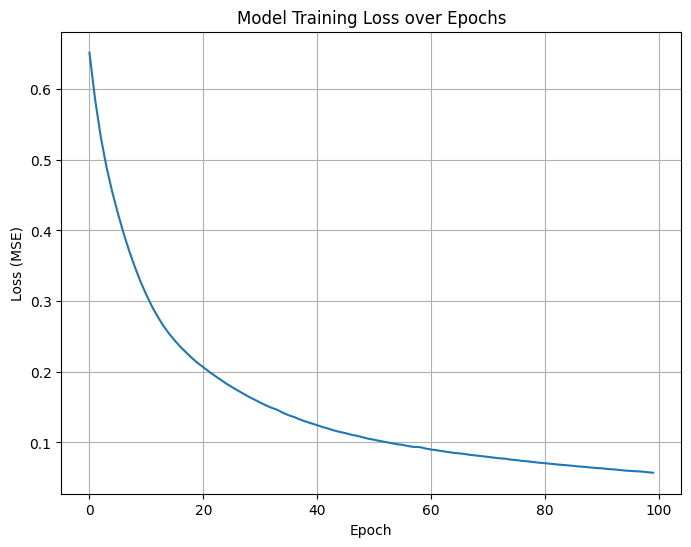

In [47]:
import matplotlib.pyplot as plt

# Get the loss from the training history
loss = history.history['loss']

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Model Training Loss over Epochs')
plt.grid(True)
plt.show()

### 6. Visualize the neural network model on a similar 3D plot.

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


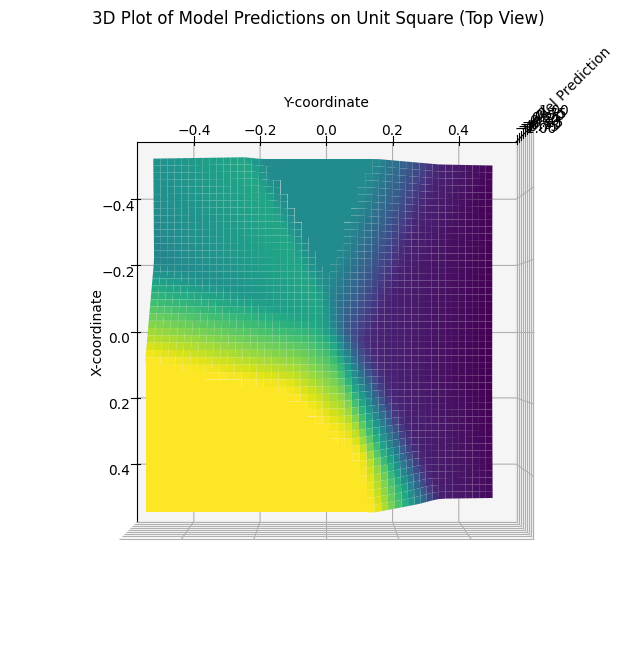

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a grid of points in the unit square centered at the origin
x = np.linspace(-0.5, 0.5, 50) # Reduced number of points for faster plotting
y = np.linspace(-0.5, 0.5, 50)
X, Y = np.meshgrid(x, y)

# Flatten the grid points for model prediction
X_flat = X.flatten()
Y_flat = Y.flatten()
input_points = np.vstack((X_flat, Y_flat)).T

# Get the model's predictions for the grid points
Z_flat = model.predict(input_points)

# Reshape the predictions back to the grid shape
Z = Z_flat.reshape(X.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Model Prediction')
ax.set_title('3D Plot of Model Predictions on Unit Square (Top View)')

# Set the viewing angle for a top-down view
ax.view_init(elev=90, azim=0) # elev=90 for top view, azim=0 or any value

# Show the plot
plt.show()

### 7. Repeat the previous exploration (1., 5., 6.) with different kind of networks like represented below.
Relates number of parameter and quality of the result.

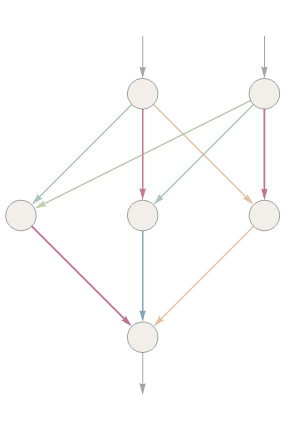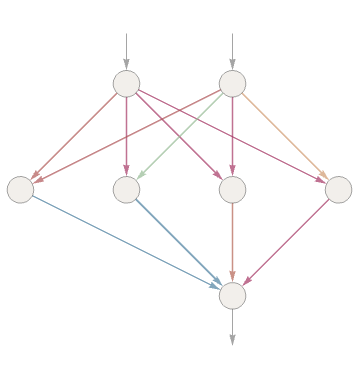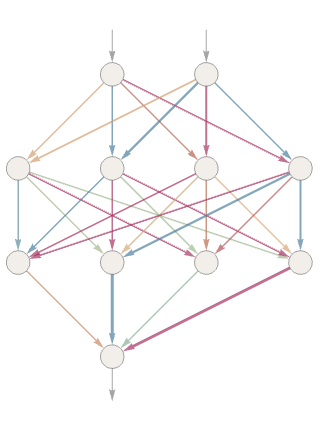

#### example 1

In [30]:
# Define the new neural network model
model_31 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),  # Explicitly define the input layer with 2 neurons
    tf.keras.layers.Dense(3, activation='relu'),  # Hidden layer with 3 neurons and ReLU activation
    tf.keras.layers.Dense(1)                                         # Output layer with 1 neuron (scalar output)
])

In [31]:
# Compile the new model
model_31.compile(optimizer='adam', loss='mse')

# Print the model summary to see the structure and parameter count
model_31.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Train the new model
history_31 = model_31.fit(X_train, y_train, epochs=100, verbose=0)

print("New model (2-3-1) trained successfully!")

New model (2-3-1) trained successfully!


In [33]:
# Generate a grid of points in the unit square centered at the origin
x = np.linspace(-0.5, 0.5, 50) # Reduced number of points for faster plotting
y = np.linspace(-0.5, 0.5, 50)
X, Y = np.meshgrid(x, y)

In [34]:
# Flatten the grid points for model prediction
X_flat = X.flatten()
Y_flat = Y.flatten()
input_points_31 = np.vstack((X_flat, Y_flat)).T

# Get the model's predictions for the grid points
Z_flat_31 = model_31.predict(input_points_31)

# Reshape the predictions back to the grid shape
Z_31 = Z_flat_31.reshape(X.shape)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


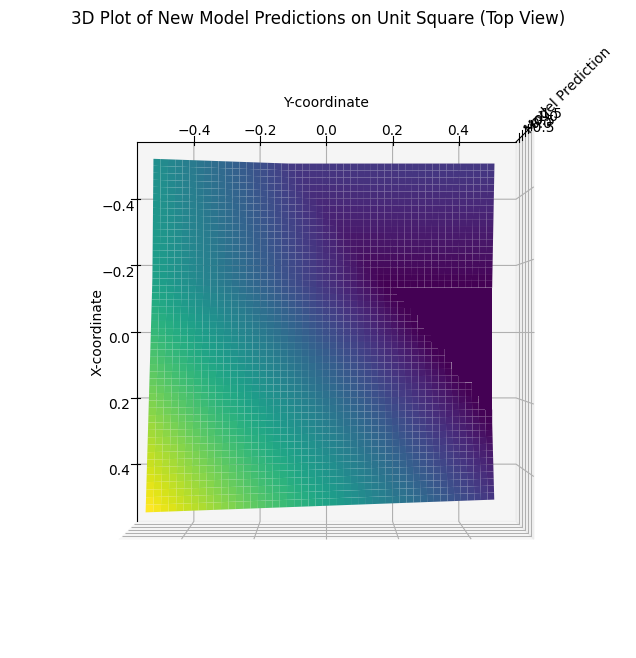

In [35]:
# Create a new figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the X, Y, and Z_31 arrays
ax.plot_surface(X, Y, Z_31, cmap='viridis')

# Add labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Model Prediction')
ax.set_title('3D Plot of New Model Predictions on Unit Square (Top View)')

# Set the viewing angle for a top-down view
ax.view_init(elev=90, azim=0) # elev=90 for top view, azim=0 or any value

# Show the plot
plt.show()

#### example 2

In [36]:
# Define the new neural network model (2-4-1)
model_41 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),  # Explicitly define the input layer with 2 neurons
    tf.keras.layers.Dense(4, activation='relu'),  # Hidden layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(1)                                         # Output layer with 1 neuron (scalar output)
])

# Compile the new model
model_41.compile(optimizer='adam', loss='mse')

# Print the model summary to see the structure and parameter count
model_41.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the new model (2-4-1)
history_41 = model_41.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 to keep the output clean

print("New model (2-4-1) trained successfully!")

New model (2-4-1) trained successfully!


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


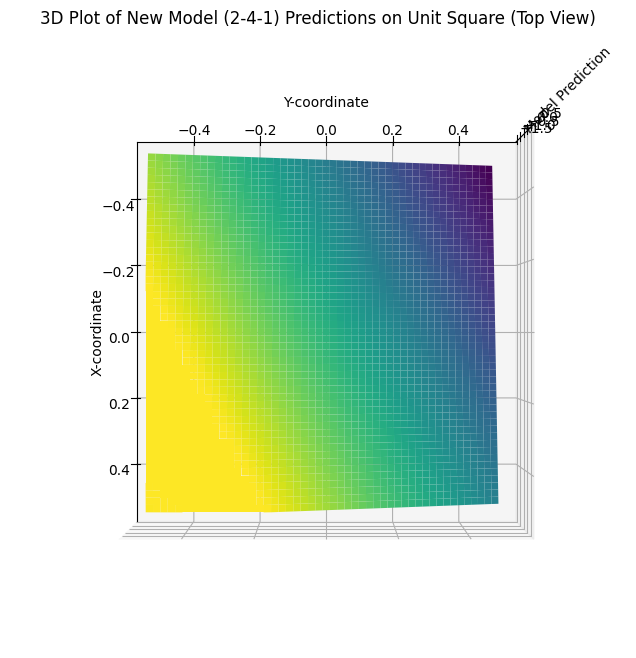

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a grid of points in the unit square centered at the origin
x = np.linspace(-0.5, 0.5, 50) # Reduced number of points for faster plotting
y = np.linspace(-0.5, 0.5, 50)
X, Y = np.meshgrid(x, y)

# Flatten the grid points for model prediction
X_flat = X.flatten()
Y_flat = Y.flatten()
input_points_41 = np.vstack((X_flat, Y_flat)).T

# Get the model's predictions for the grid points
Z_flat_41 = model_41.predict(input_points_41)

# Reshape the predictions back to the grid shape
Z_41 = Z_flat_41.reshape(X.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z_41, cmap='viridis')

# Add labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Model Prediction')
ax.set_title('3D Plot of New Model (2-4-1) Predictions on Unit Square (Top View)')

# Set the viewing angle for a top-down view
ax.view_init(elev=90, azim=0) # elev=90 for top view, azim=0 or any value

# Show the plot
plt.show()

#### exemple 3

In [49]:
# Define the new neural network model (2-4-4-1)
model_441 = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),  # Explicitly define the input layer with 2 neurons
    tf.keras.layers.Dense(4, activation='relu'),  # First hidden layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),  # Second hidden layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(1)                                         # Output layer with 1 neuron (scalar output)
])

In [50]:
# Compile the new model
model_441.compile(optimizer='adam', loss='mse')

# Print the model summary to see the structure and parameter count
model_441.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the new model (2-4-4-1)
history_441 = model_441.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 to keep the output clean

print("New model (2-4-4-1) trained successfully!")

New model (2-4-4-1) trained successfully!


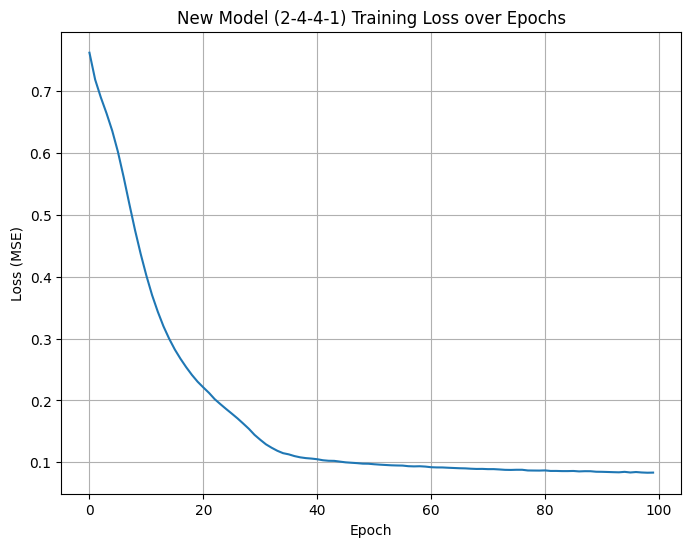

In [42]:
import matplotlib.pyplot as plt

# Get the loss from the training history
loss_441 = history_441.history['loss']

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(loss_441)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('New Model (2-4-4-1) Training Loss over Epochs')
plt.grid(True)
plt.show()

In [43]:
# Generate an array of 50 equally spaced points between -0.5 and 0.5 for the x-axis
x = np.linspace(-0.5, 0.5, 50)

# Generate an array of 50 equally spaced points between -0.5 and 0.5 for the y-axis
y = np.linspace(-0.5, 0.5, 50)

# Create a 2D grid from the x and y arrays using np.meshgrid
X, Y = np.meshgrid(x, y)

In [44]:
# Flatten the grid points for model prediction
X_flat = X.flatten()
Y_flat = Y.flatten()
input_points_441 = np.vstack((X_flat, Y_flat)).T

# Get the model's predictions for the grid points
Z_flat_441 = model_441.predict(input_points_441)

# Reshape the predictions back to the grid shape
Z_441 = Z_flat_441.reshape(X.shape)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


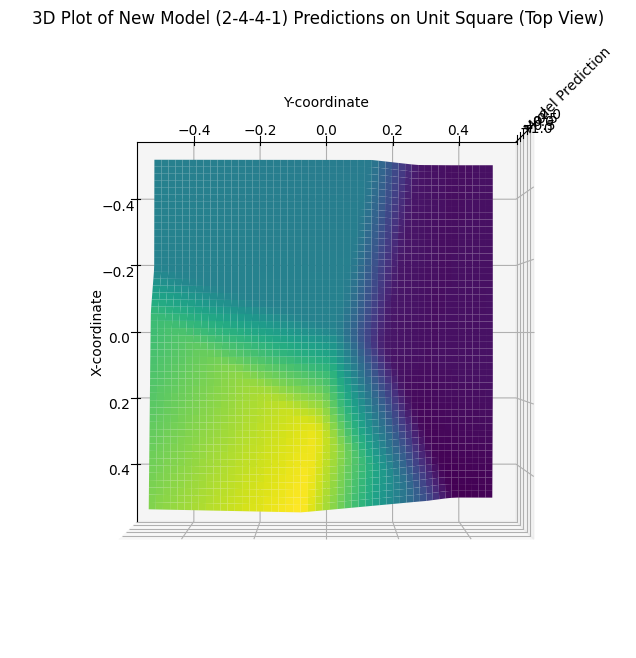

In [45]:
# Create a new figure and a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z_441, cmap='viridis')

# Add labels and title
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Model Prediction')
ax.set_title('3D Plot of New Model (2-4-4-1) Predictions on Unit Square (Top View)')

# Set the viewing angle for a top-down view
ax.view_init(elev=90, azim=0) # elev=90 for top view, azim=0 or any value

# Show the plot
plt.show()